In [1]:
"""
Landon Buell
Hands on Machien Learning
Ch.3 - Classification
2 Novemebr 2019
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml

In [2]:
""" MNIST Data set of Hand-Written Characters """

# fetch the dataset
mnist = fetch_openml('mnist_784',version=1)
print("Dictionary Keys:")
mnist.keys()

Dictionary Keys:


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# Look at particular data arrays
X,Y = mnist["data"],mnist["target"]
print(np.shape(X))
print(np.shape(Y))

# there are 70,000 images, each with (28x28) pixels 

(70000, 784)
(70000,)


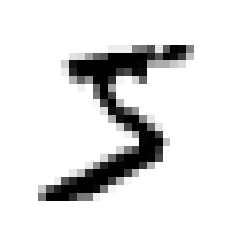

5


In [4]:
# Examine single digit
digit = X[0]
image = digit.reshape(28,28)

plt.imshow(image,cmap=cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()
# looks like a '5', print what it actually is
print(Y[0])
# it's labeled a 5!
Y = Y.astype(np.uint8)

In [5]:
# isolate training and testing datasets
X_train,X_test = X[:60000],X[60000:]
Y_train,Y_test = Y[:60000],Y[60000:]
# already shuffled, so good cross validation

In [6]:
""" Training a Binary Classifier """

# Create a binary classifier as a "5-Detector", find all instances
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

# start with "Stochastic Gradient Descent" (SGD) classifer
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
# this maps the X_training data (the images of digits)
# To the known training values of '5'

sgd_clf.predict([digit])
# correctly identifies that x[0] is a 5!

array([ True])

Image Labeled as: 5


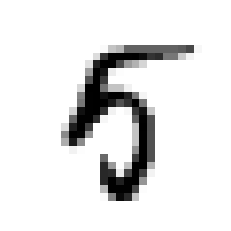

array([ True])

In [7]:
idx = 2029
# Run test on a single index in the training dataset
test = X_test[idx]
print("Image Labeled as:",Y_test[idx])
image = test.reshape(28,28)
plt.imshow(image,cmap=cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

sgd_clf.predict([test])

In [8]:
""" Performance Measure """

# use cross_val_score() function to evaulate the SGD classifier
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')
# Cross_val_score args: (Uses K-fold X-validation)
    # classifier object
    # x training data
    # y training data (labeled data)
    # cv = num of crossval folds
    
# prints: array([0.95035, 0.96035, 0.9604 ])
# Mostly above 95% accuracy

array([0.95035, 0.96035, 0.9604 ])

In [9]:
from sklearn.base import BaseEstimator

# Look at a 'dumb' classiifier - the "never5Class"

class Never5Classifier (BaseEstimator):
    def fit(self,X,Y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
# test Model's accuracy
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

# prints: array([0.91125, 0.90855, 0.90915])
# 90% accuracy - too bad 90% of data is NOT 5
# This model is as good as just guessing

array([0.91125, 0.90855, 0.90915])

In [9]:
""" Confusion Matrix """

# Generally a Better way to evaluate the performance of a classifer object
# Build a cross validation prediction model

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

# used K-Fold X-Validation 
# Instead of evaluation score, model returns predictions of each test fold

con_mat = confusion_matrix(y_train_5,y_train_pred)
# Confusion Matrix Arguments:
    # y_train_5 is raw training set
    # y_train-pred is X-Val predicted data
print(con_mat)

[[53892   687]
 [ 1891  3530]]


In [10]:
# Pretend we have perfect model

y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5,y_train_perfect_pred)

# New confusion matrix - perfectly diagonal

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [11]:
# Can also use Precision & Recall to verify legtimacy of model

from sklearn.metrics import precision_score , recall_score

# Precision score = (TP)/(TP+FN)
pres = precision_score(y_train_5,y_train_pred)
print("Precision score:",pres)
# recall score = (TP)/(TP + FN)
recl = recall_score(y_train_5,y_train_pred)
print("Recall Score:",recl)

# this indicates about the 5-Detector:
# Finds a 5 correctly, only 83 % of the time
# Only detects a 5, 65% of the time

from sklearn.metrics import f1_score

# Combined these metrics into an "F_1 score"
# also called harmonic mean of precision & recall

f1 = f1_score(y_train_5,y_train_pred)
print("F1 Score:",f1)


Precision score: 0.8370879772350012
Recall Score: 0.6511713705958311
F1 Score: 0.7325171197343846


In [12]:
""" Find Score for Each Binary Classifier Decision """

# classification score
y_scores = sgd_clf.decision_function([digit])
print("Classification Score:",y_scores)

# manually set threshold
threshold = 0
y_digit_predict = (y_scores > threshold)
print("Is '5':",y_digit_predict)

# SGD Classifier uses a threshold of 0 by default
# manually set it to 20000 for example:

threshold = 20000
y_digit_predict = (y_scores > threshold)
print("Is '5':",y_digit_predict)

# This decreases the recall score

Classification Score: [2164.22030239]
Is '5': [ True]
Is '5': [False]


In [ ]:
""" Deciding a threshold to use """

# get scores of all instances in the training set, using cross_val_predict()
# Use decision function instead of predictions
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,
                             cv=3,method='decision_function')

# All precisions & Recalls can be computed 
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(Y_train_5,y_scores)


In [ ]:
def Plot_Precision_Recall (precs,recalls,threshs):
    """ Matplotlib precision Recall Curve """
    plt.figure(figsize=(20,8))
    plt.xlabel("Threshold",size=20,weight='bold')
    plt.plot(threshs,precesions[:-1],'b--',label="Precision")
    plt.plot(threshs,recalls[:-1],'g--',label='Recall')
    plt.ylim([0,1])
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()